In [70]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [71]:
df = pd.read_csv('C:\\Users\\Ольга\\Downloads\\flowers2.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [72]:
#Мне приходится это сделать, потому что в дальнейшем если я поставлю Y-Train, как variety
#мне напишут 'c' argument must be a color, a sequence of colors
#
def ozenka(df):
    if df == 'Setosa':
        return 1
    elif df == 'Virginica':
        return 2
    else:
        return 3

df['classification'] = df['variety'].apply(ozenka)


In [73]:
iris = df[['sepal_length', 'sepal_width', 'classification']]

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
X = df[['sepal_length', 'sepal_width']]
y = df['classification']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
len(y_test)

30

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [79]:
lda = LinearDiscriminantAnalysis()

In [80]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [81]:
lda.predict(X_train)

array([1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3, 2, 1, 1, 3, 2, 2, 2, 2, 3, 2,
       3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 3, 2, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 1, 3, 2, 1, 1, 3, 2, 1, 3, 1, 1, 3, 3, 2, 3, 3, 2, 3,
       1, 1, 3, 2, 1, 1, 1, 2, 3, 1, 2, 3, 1, 3, 2, 3, 2, 2, 1, 2, 3, 2,
       3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2,
       2, 2, 3, 3, 1, 3, 3, 1, 3, 2], dtype=int64)

In [82]:
result = pd.DataFrame([y_test,lda.predict(X_test)]).T

In [83]:
#Очень плохой результат. что сделано не так?
result

,classification,Unnamed 0
73,3.0,NaN
18,1.0,3.0
118,2.0,NaN
78,3.0,NaN
76,3.0,NaN
31,1.0,NaN
64,3.0,NaN
141,2.0,NaN
68,3.0,NaN
82,3.0,NaN


In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test,lda.predict(X_test))

0.9

In [86]:
lda.coef_

array([[-5.98937381,  8.39904481],
       [ 4.17811472, -4.38202597],
       [ 1.86898728, -4.02592145]])

In [87]:
import matplotlib as mpl
print(mpl.__version__)
colors = [(0, .5, 1), (1, .2, .5), (.4, 1, .2)]
cmap = mpl.colors.ListedColormap(set(colors))
print(cmap([0, .5, 1]))

3.2.2
[[1.  0.2 0.5 1. ]
 [0.4 1.  0.2 1. ]
 [0.  0.5 1.  1. ]]


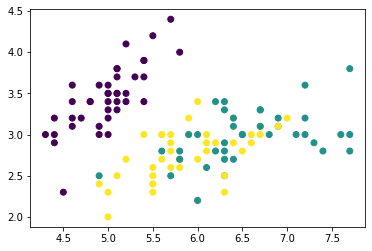

In [88]:
plt.scatter(x=X_train['sepal_length'], y=X_train['sepal_width'],c=y_train)
plt.show()

In [89]:
#Здесь разделяющая черта диагональ, 2 признака несут одинаковый значения. по крайней мере отсортировали один вид от двух других

In [90]:
small_train = X_train[(y_train == 2) | (y_train == 1)]
small_train = small_train[['sepal_length', 'sepal_width']]
sy_train = y_train[(y_train == 2) | (y_train == 1)]
small_test = X_test[(y_test == 2) | (y_test == 1)]
small_test = small_test[['sepal_length', 'sepal_width']]
sy_test = y_test[(y_test == 2) | (y_test == 1)]

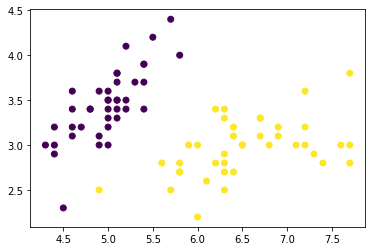

In [91]:
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
plt.show()

In [92]:
#есть какое то разделение по sepal_length по крайней мере у Virginica и Setosa

In [93]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [94]:
lda_small.means_

array([[4.99      , 3.4525    ],
       [6.53333333, 2.96666667]])

In [95]:
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [96]:
#я потренировалась на линейной регрессии, но правильно в данном случае использовать логистическую

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [101]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [102]:
lr.predict(small_test)

array([1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1],
      dtype=int64)

In [103]:
lr.predict_proba(small_test)

array([[7.47767000e-01, 2.52233000e-01],
       [6.95999644e-04, 9.99304000e-01],
       [7.56095439e-01, 2.43904561e-01],
       [2.01281625e-02, 9.79871837e-01],
       [7.54501234e-02, 9.24549877e-01],
       [8.86384967e-01, 1.13615033e-01],
       [7.40205412e-01, 2.59794588e-01],
       [8.77609113e-01, 1.22390887e-01],
       [9.44972519e-01, 5.50274811e-02],
       [5.10449313e-02, 9.48955069e-01],
       [4.53596789e-02, 9.54640321e-01],
       [9.40694686e-01, 5.93053145e-02],
       [1.47845686e-01, 8.52154314e-01],
       [9.09079516e-01, 9.09204837e-02],
       [4.53596789e-02, 9.54640321e-01],
       [4.70659264e-03, 9.95293407e-01],
       [2.90802796e-02, 9.70919720e-01],
       [1.04542896e-02, 9.89545710e-01],
       [3.27952139e-02, 9.67204786e-01],
       [8.86384967e-01, 1.13615033e-01],
       [9.05744283e-01, 9.42557169e-02]])

In [104]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [105]:
lr.coef_

array([[ 2.9276416 , -2.08410011]])

AttributeError: 'list' object has no attribute 'Normalize'

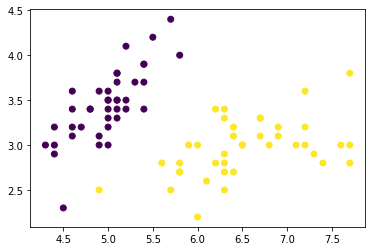

In [108]:
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [109]:
irisklaster = df[['sepal_length', 'sepal_width']]

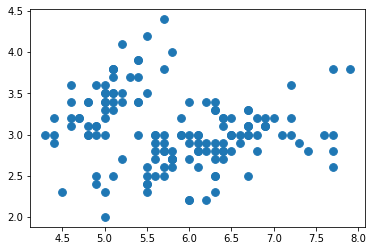

In [110]:
plt.scatter(irisklaster['sepal_length'],irisklaster['sepal_width'], cmap='autumn', s=60)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [112]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [113]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

999
0
9
0


In [114]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[-1.1594465 ],
       [-0.81498824],
       [ 0.21838654],
       [-1.1594465 ],
       [-1.1594465 ],
       [ 1.59621957],
       [-0.81498824],
       [ 0.21838654],
       [-1.50390476],
       [ 0.21838654],
       [ 0.90730306],
       [ 0.90730306],
       [ 1.25176132],
       [ 1.25176132],
       [ 1.59621957],
       [ 0.5628448 ],
       [-0.47052998],
       [ 1.59621957],
       [-1.1594465 ],
       [-0.12607172],
       [-0.47052998],
       [-0.47052998],
       [-0.47052998],
       [-0.47052998],
       [-0.81498824],
       [ 1.59621957],
       [ 0.21838654],
       [-0.47052998],
       [-0.81498824],
       [ 0.90730306],
       [-0.47052998],
       [-1.50390476],
       [-0.81498824],
       [-0.81498824],
       [ 0.21838654],
       [-0.81498824],
       [-0.47052998],
       [-1.1594465 ],
       [ 0.90730306],
       [ 1.25176132],
       [-1.50390476],
       [ 0.21838654],
       [-1.1594465 ],
       [ 1.25176132],
       [ 1.59621957],
       [ 0

In [115]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.721251037375933
-1.6720130432688
1.5962195747033796
-1.5039047611469474


In [116]:
X_scaled = scaler.fit_transform(X,y)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

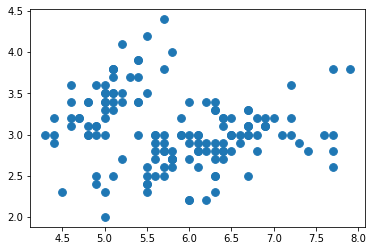

In [117]:
plt.scatter(irisklaster['sepal_length'],irisklaster['sepal_width'], cmap='autumn', s=60)

In [118]:
#никаких изменений нет. Нормализация была не нужна?

In [119]:
from sklearn.cluster import KMeans

In [120]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

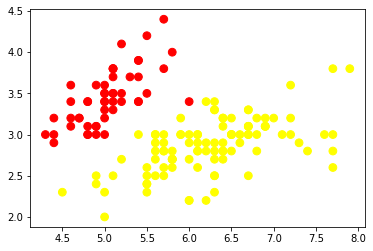

In [121]:
plt.scatter(irisklaster['sepal_length'],irisklaster['sepal_width'], cmap='autumn', c=clusters, s=60)

In [122]:
k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

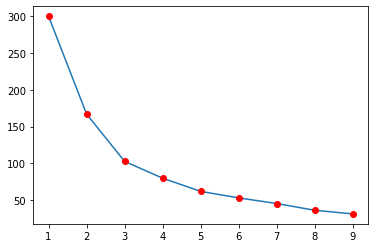

In [123]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [124]:
#3 кластера видны четко
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

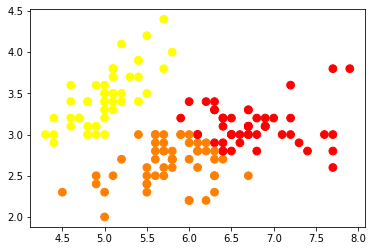

In [125]:
plt.scatter(irisklaster['sepal_length'],irisklaster['sepal_width'], cmap='autumn', c=clusters, s=60)

In [ ]:
# кластеры четко показывают границы. 